In [1]:
options()
backup_options <- options()

$add.smooth
[1] TRUE

$browserNLdisabled
[1] FALSE

$callr.condition_handler_cli_message
function (msg) 
{
    custom_handler <- getOption("cli.default_handler")
    if (is.function(custom_handler)) {
        custom_handler(msg)
    }
    else {
        cli_server_default(msg)
    }
}
<bytecode: 0x000001d0fcb7d1b8>
<environment: namespace:cli>

$catch.script.errors
[1] FALSE

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$crayon.enabled
[1] TRUE

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (filename = null_filename, ...) 
ok_device(filename, ...)
<bytecode: 0x000001d0fdf7a548>
<environment: 0x000001d0fd960648>

$device.ask.default
[1] FALSE

$digits
[1] 7

$echo
[1] FALSE

$editor
[1] "notepad"

$encoding
[1] "native.enc"

$example.ask


EuStockMarkets 数据集包含了从1991年到1998年每日的股市收盘指数，具体包括以下四个股市：

- DAX（德国）
- SMI（瑞士）
- CAC（法国）
- FTSE（英国）

## 折线图

In [2]:
head(EuStockMarkets)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


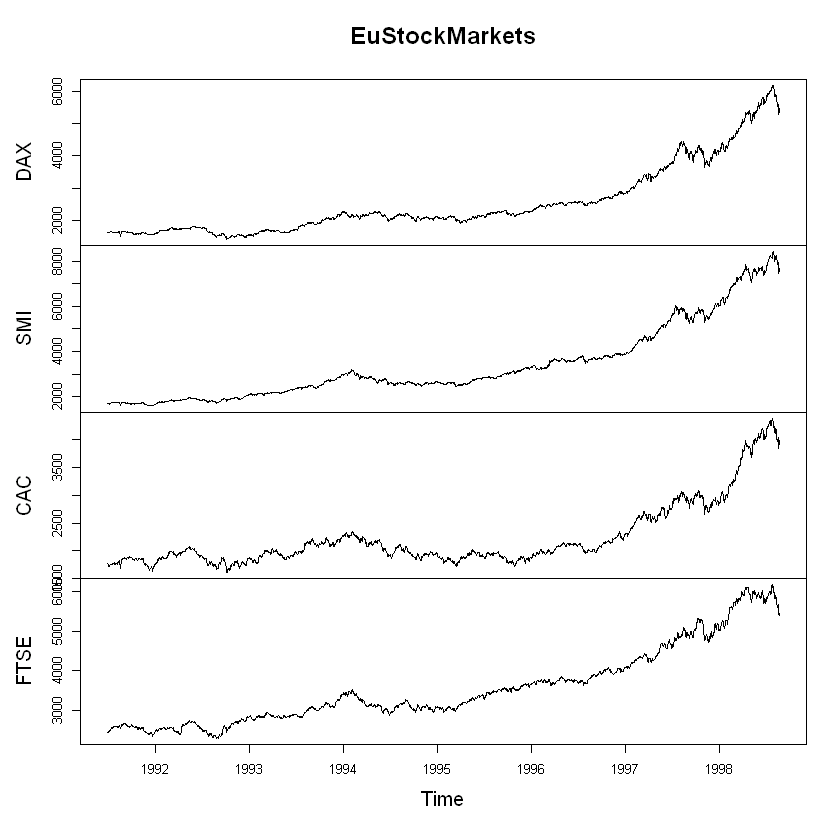

In [3]:
# 查看数据的过程

# 1.绘制图像
plot(EuStockMarkets)

In [4]:
# 2.查看列的类别
class(EuStockMarkets)

[1] "mts"    "ts"     "matrix" "array"

In [5]:
# 3.每年的数据频率
frequency(EuStockMarkets)

[1] 260

In [6]:
# 4.查看数据的开始和结束时间
print(start(EuStockMarkets))
print(end(EuStockMarkets))

[1] 1991  130
[1] 1998  169


In [7]:
# 5.window选取部分的数据
head(window(EuStockMarkets, start = 1997, end = 1998))

DAX,SMI,CAC,FTSE
2844.09,3869.8,2289.6,4092.5
2844.09,3869.8,2289.6,4092.5
2844.09,3869.8,2303.8,4092.5
2859.22,3922.2,2307.0,4091.0
2880.07,3948.3,2318.6,4115.7
2880.07,3942.2,2315.7,4118.5


## 直方图

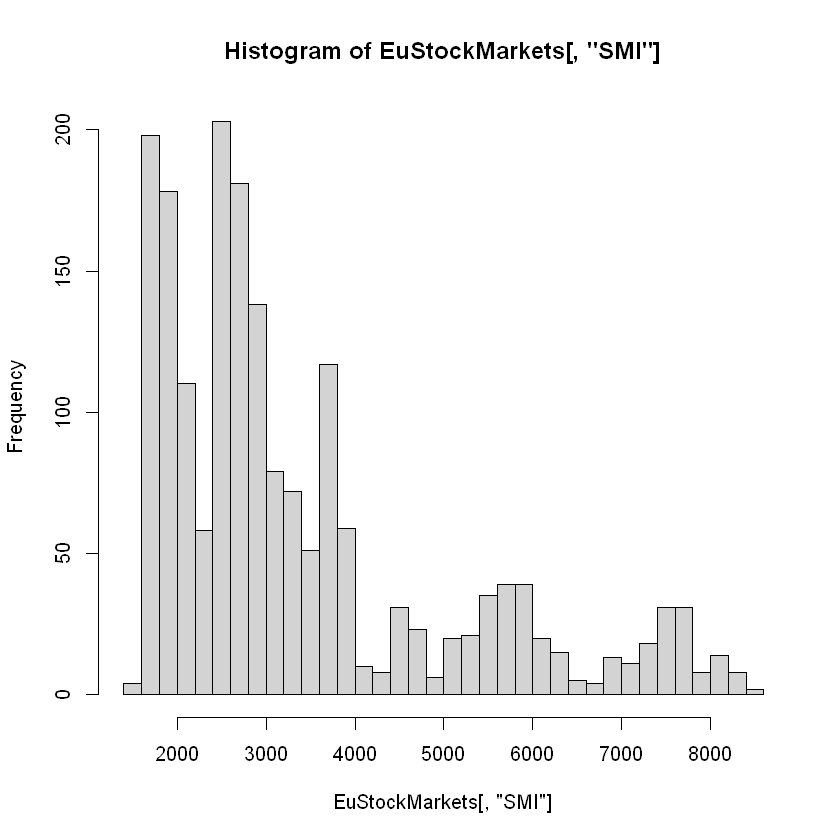

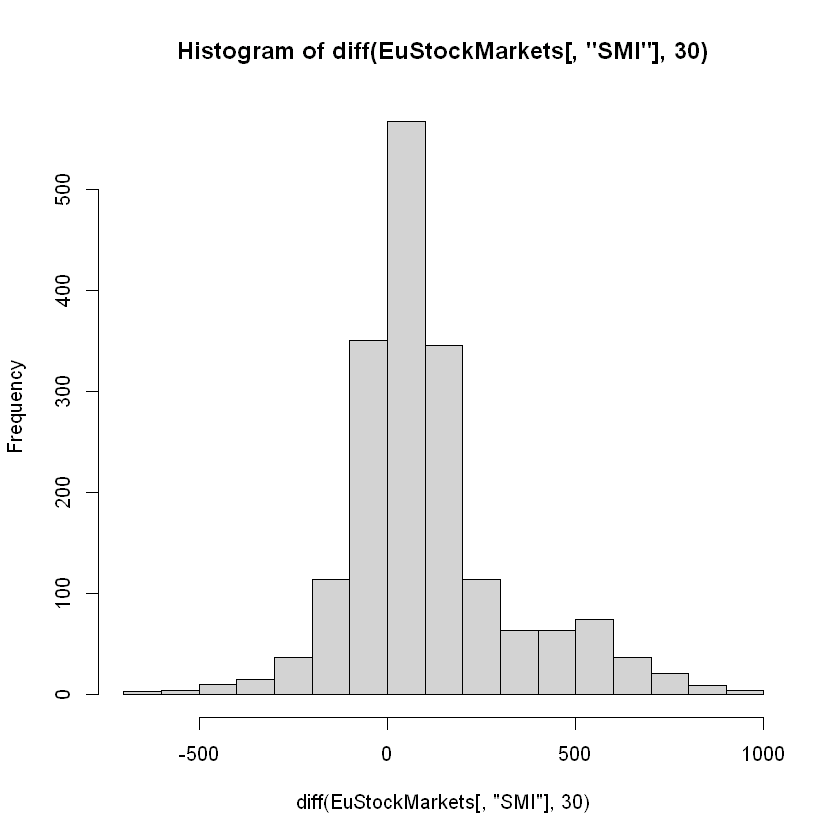

In [8]:
hist(EuStockMarkets[, "SMI"], 30)       # breaks = 30:将数据分成多少个区间
hist(diff(EuStockMarkets[, "SMI"], 30)) # diff() 函数用于计算差分，即当前元素与前一个元素之间的差
# 对数据进行差分可以消除趋势 可以看出符合正态分布 带有趋势的数据不会产生非常有用的可视化结果

## 散点图

确定两个股票指数在特定时间段内有何联系，以及它们的价格变化是否相关

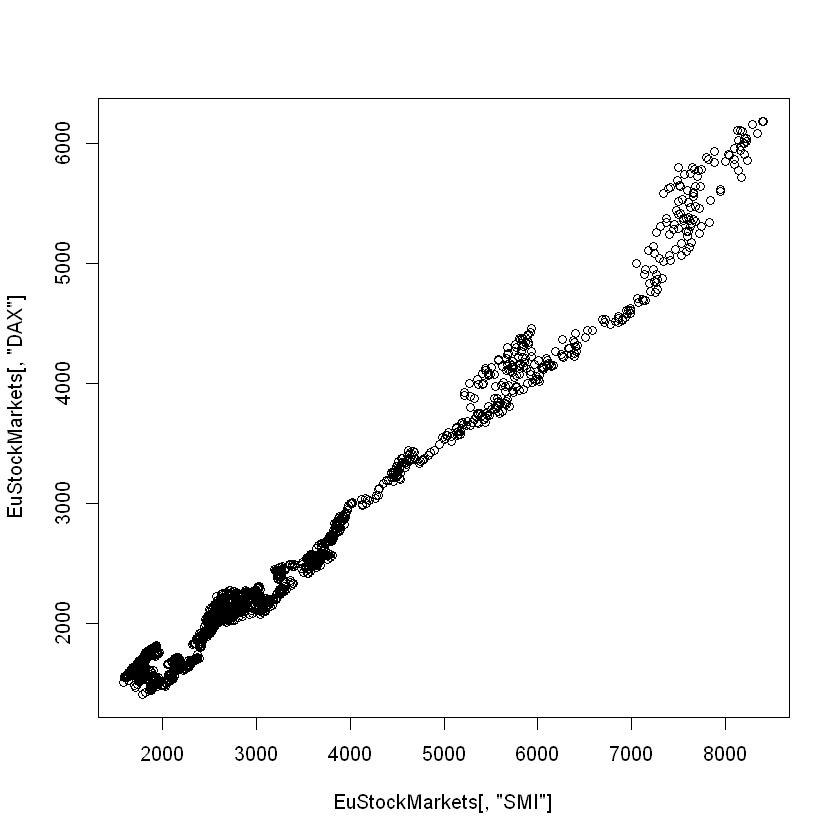

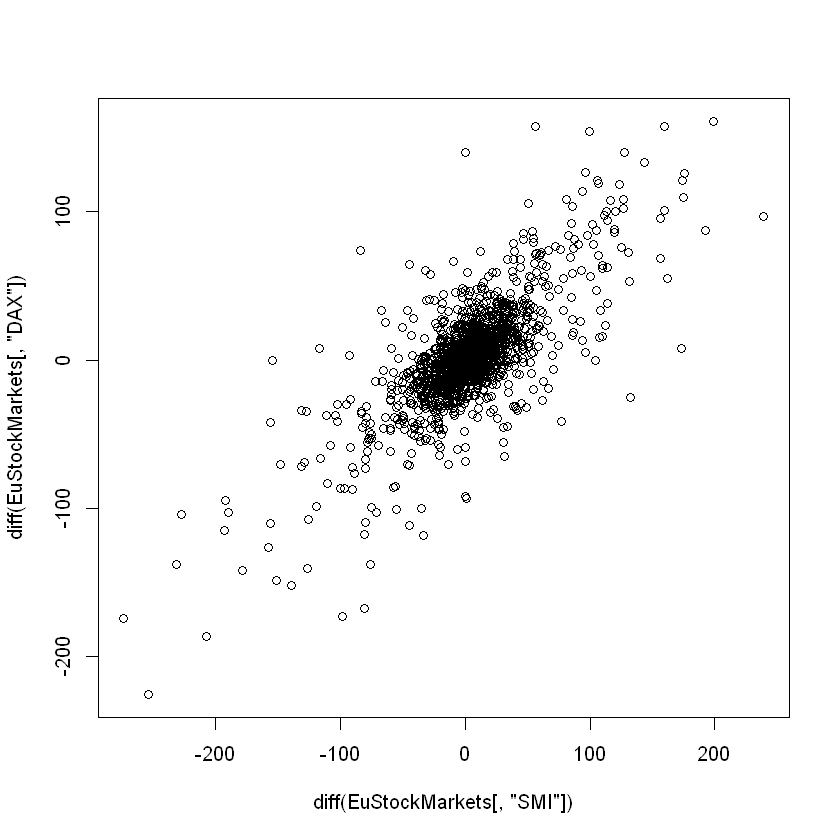

In [9]:
plot(EuStockMarkets[, "SMI"], EuStockMarkets[, "DAX"])
plot(diff(EuStockMarkets[, "SMI"]), diff(EuStockMarkets[, "DAX"]))

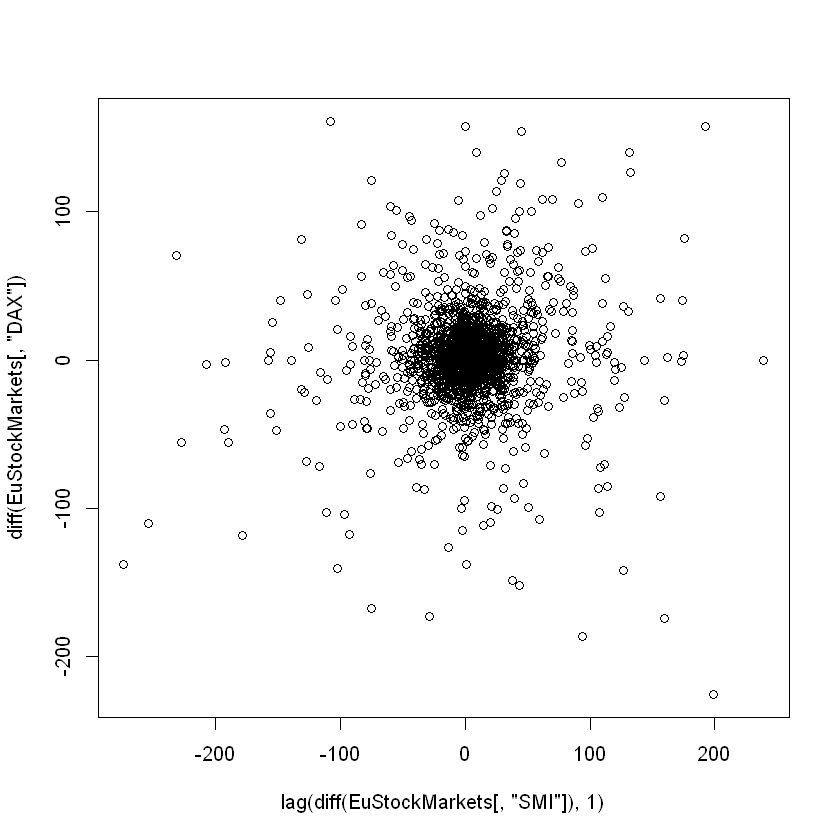

In [10]:
# 引入时间差, 差值向前移动一天
plot(lag(diff(EuStockMarkets[, "SMI"]), 1), # lag会前移时间
         diff(EuStockMarkets[, "DAX"]))
# 结果表明: 如果引入时间差, 就会使股票之间的相关性消失

# 3.2时间序列性质分析

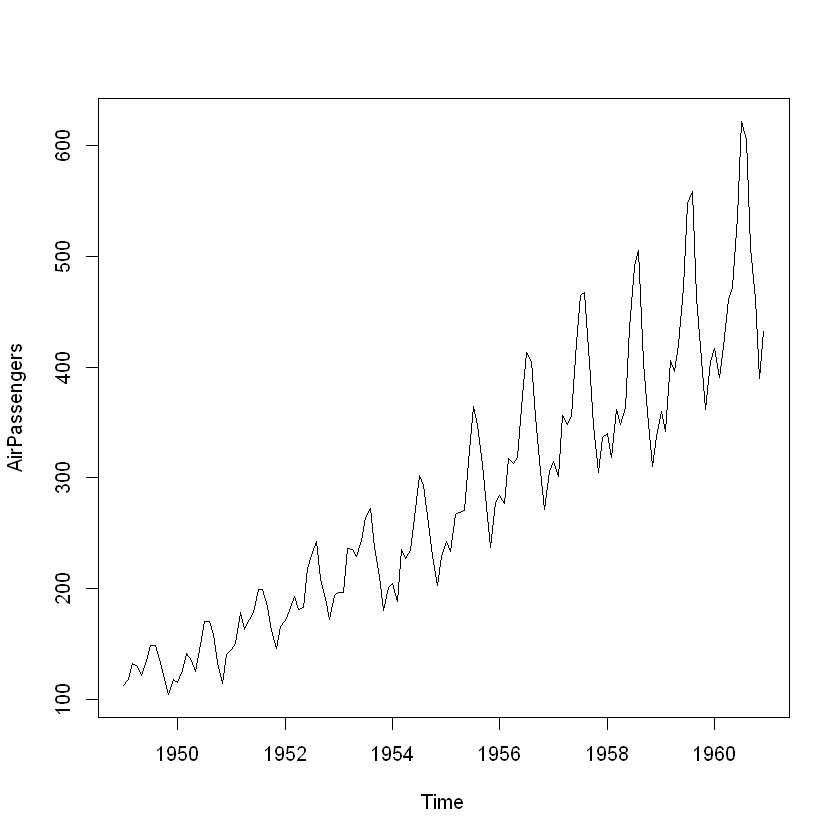

In [11]:
plot(AirPassengers)

## 使用窗口函数

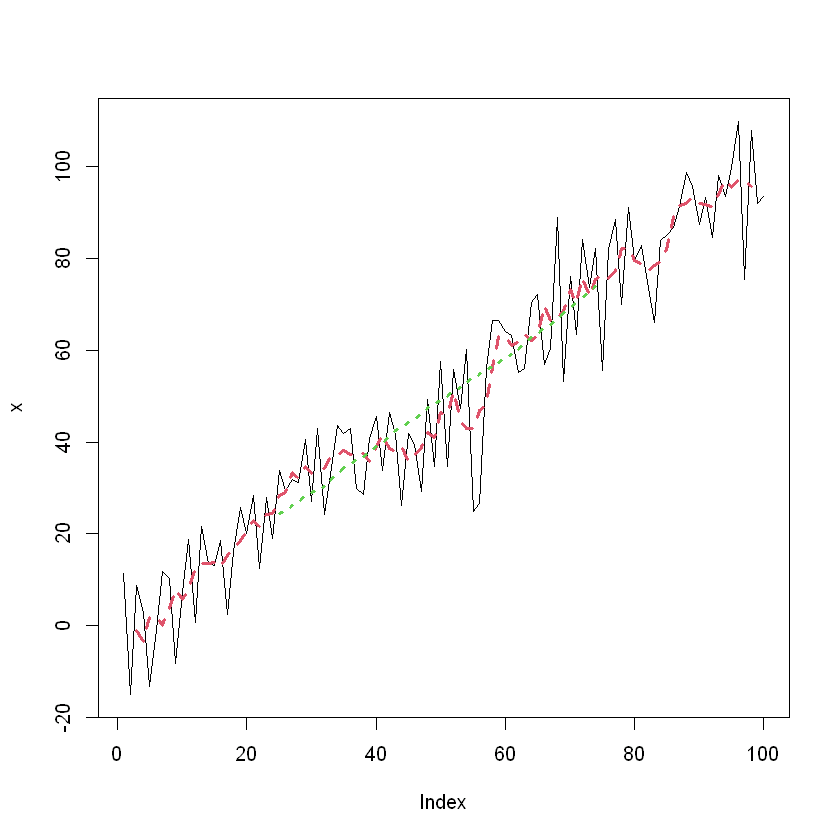

In [12]:
# 计算移动平均数
x <- rnorm(n = 100, mean = 0, sd = 10) + 1:100
# 定义滤波器, 是一个均匀的滑动平均滤波器
mn <- function(n) rep(1 / n, n)  # 定义函数 rep(1 / n, n): 将 1 / n 这个值重复 n 次

plot(x, type = 'l', lwd = 1)
lines(filter(x, mn(5 )), col = 2, lwd = 3, lty = 2) # 滤波器 mn(5) 的作用是使数据的每个点由它前后 2 个点和自己进行加权平均
lines(filter(x, mn(50)), col = 3, lwd = 3, lty = 3)

- 左右对齐
    - 在 左对齐 模式下，滑动窗口会将 窗口的左边界对齐 到当前的数据点。也就是说，**窗口的第一个元素对应的是当前数据点**，窗口的右边缘会随着窗口滑动而变化。
    - 在 右对齐 模式下，滑动窗口会将 窗口的右边界对齐 到当前的数据点。也就是说，**窗口的最后一个元素对应的是当前数据点**，窗口的左边缘会随着窗口滑动而变化
- 窗口左侧对齐处理的是将来的数据，窗口右侧对齐则仅处理过去的数据
    - 左对齐时，窗口包含的数据是当前数据点及其**后续**的数据点, 常用来**预测未来**

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




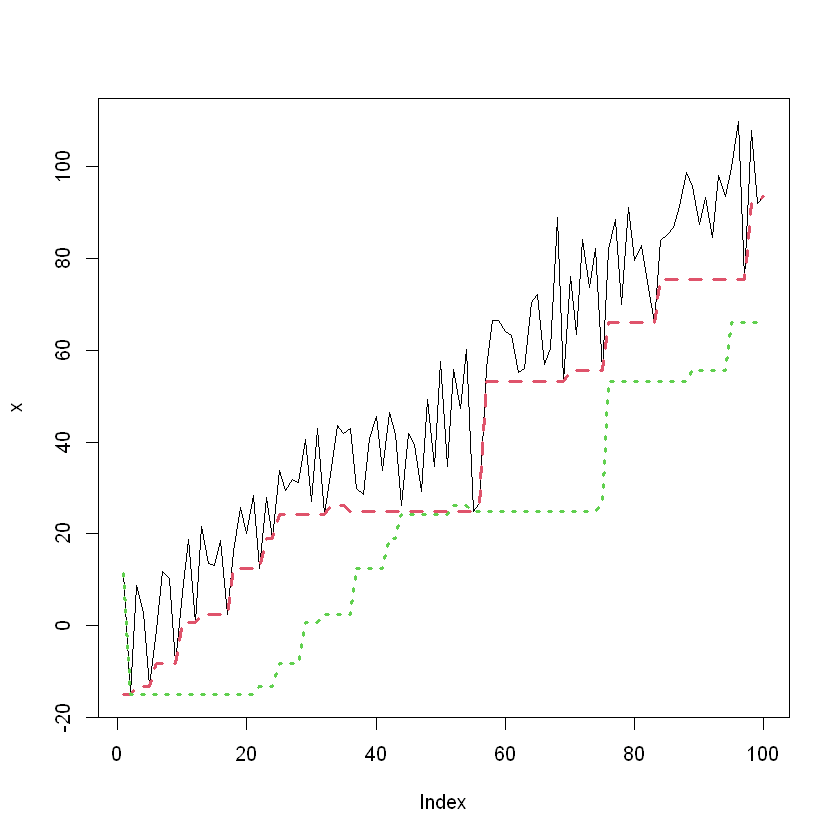

In [13]:
require(zoo)
#    时间序列（zoo 对象）  窗口大小    应用的函数
f1 <- rollapply(zoo(x),    20,     function(w) min(w),
                #对齐方式       无法完全填充时（例如数据点不足 20 个时）也会返回结果
                align = "left", partial = TRUE)
f2 <- rollapply(zoo(x), 20, function(w) min(w),
                align = "right", partial = TRUE)

plot(x, lwd = 1, type = "l")                # 用 plot() 绘制原始数据
lines(f1, col = 2, lwd = 3, lty = 2)        # 使用lines() 在已经存在的图形上叠加新的线条
lines(f2, col = 3, lwd = 3, lty = 3)
# 红色为左对齐

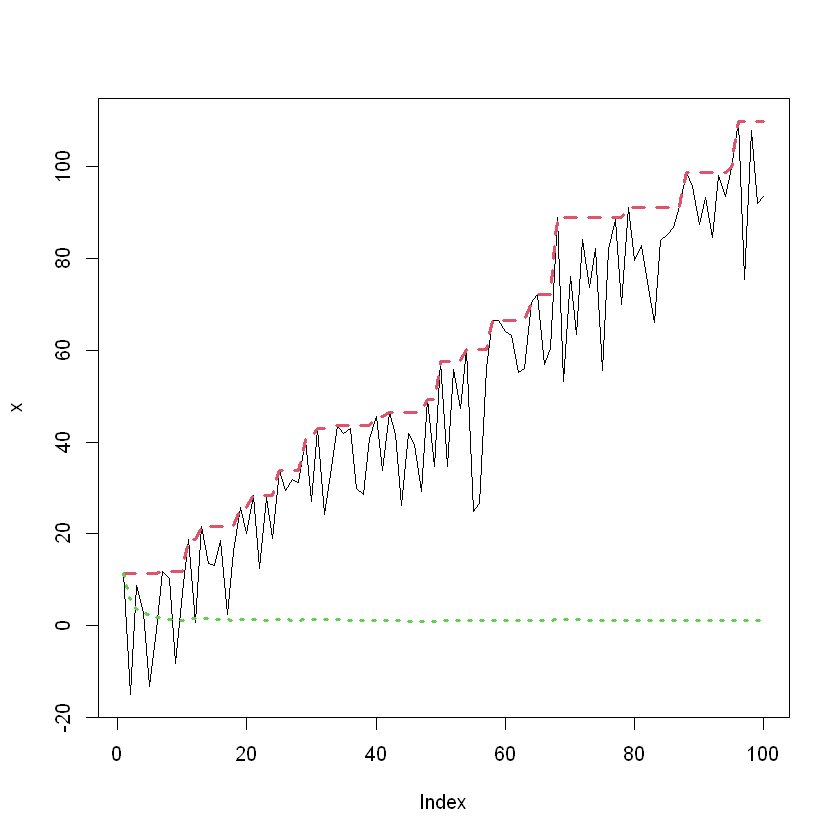

In [14]:
# 拓展窗口
# 仅当你评估概括统计量，并且你认为它是稳定的而不随时间演变或剧烈波动时，才可以应用扩展窗口进行探索
# 扩展窗口从一个给定的最小值开始，随着时间的推移，它会渐渐扩展到包含给定时间段内的每个数据点
# 扩展窗口可以帮助你维护“实时”的概括统计量，让你在收集更多信息时可以进行实时估算

plot(x, lwd = 1, type = "l")
lines(cummax(x), col = 2, lwd = 3, lty = 2) # 累积最大值（长虚线）:最大值等于某个时刻的全局最大值 
# 将 cummax(x) 中每个元素除以对应位置的时间点索引，得到的是每个时刻的 累积最大值与时间步长的比值。  
lines(cummax(x)/1:length(x), col = 3, lwd = 3, lty = 3)     # 1:length(x)<->seq_along(x)

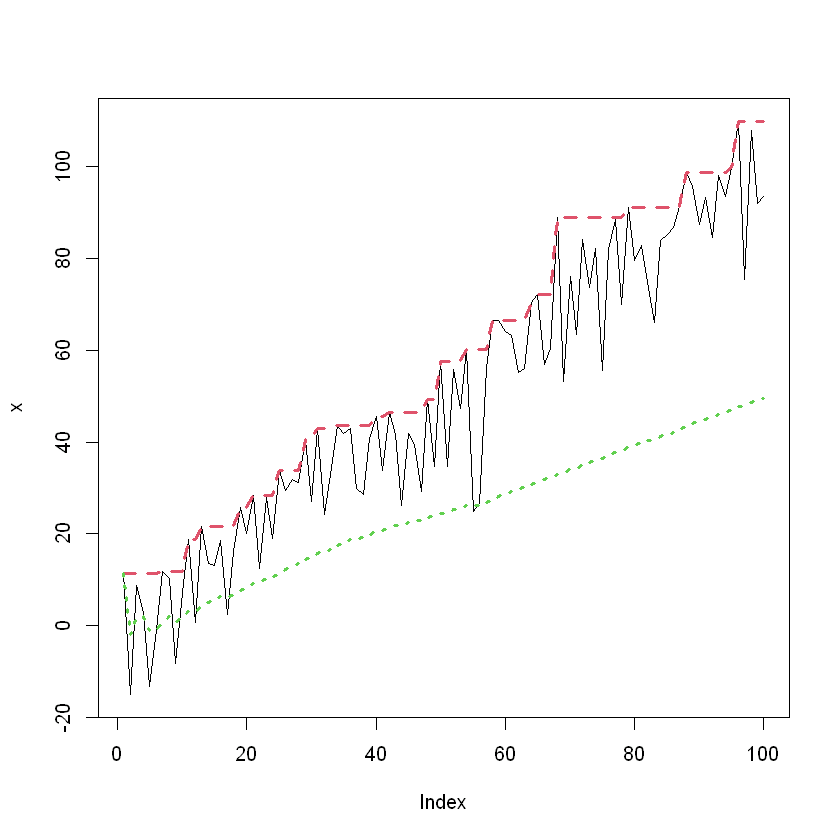

In [15]:
# 使用roolapply()函数实现自定义函数
plot(x, type = "l", lwd = 1)
lines(rollapply(zoo(x), seq_along(x), FUN = max,
                        partial = TRUE, align = "right"),
        col = 2, lwd = 3, lty = 2)
lines(rollapply(zoo(x), seq_along(x), FUN = mean,   # seq_along(x): 生成与 x 对象的长度相同的整数序列
                        partial = TRUE, align = "right"),
        col = 3, lwd = 3, lty = 3)

## 自相关性

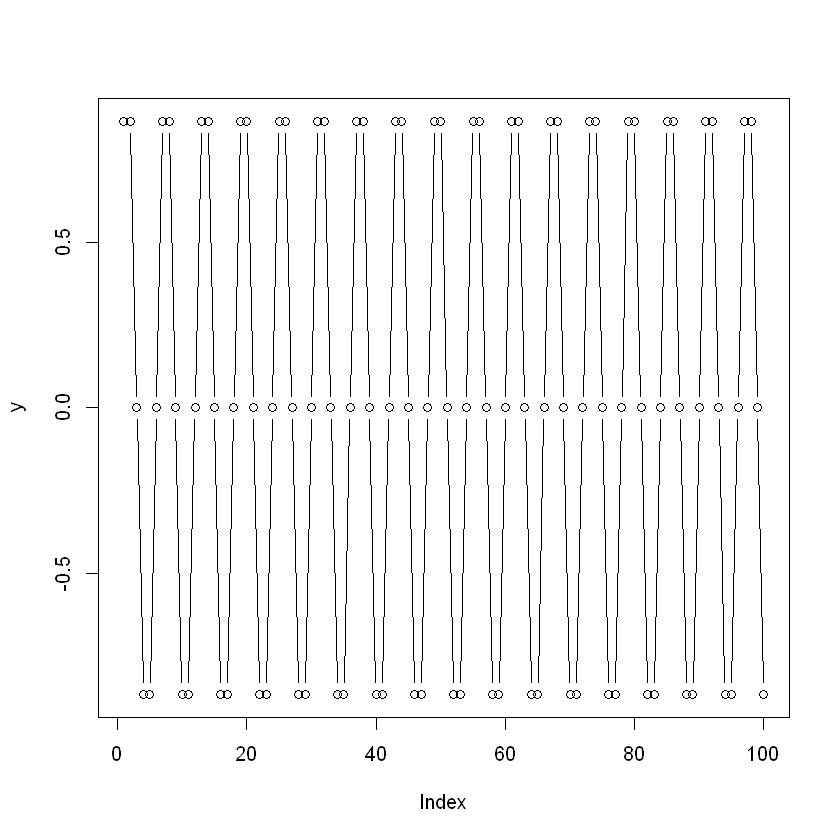

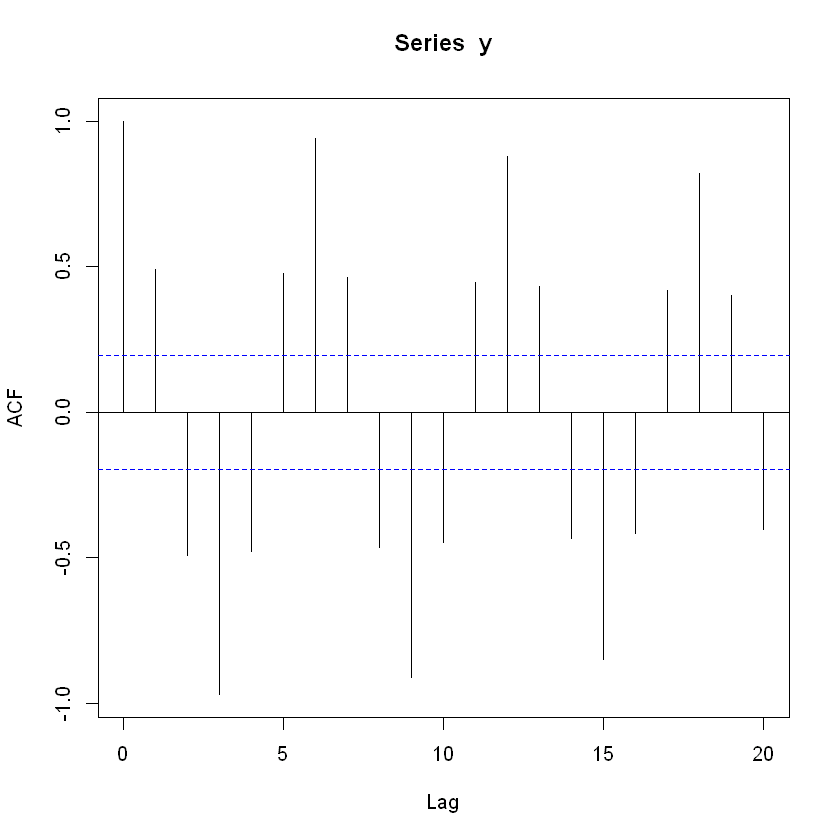

In [16]:
# 自相关函数

x <- 1:100
y <- sin(x * pi / 3)
plot(y, type = "b")
acf(y)
# 结果表明: 滞后为0 时, 相关性为1(所有的都是)

In [17]:
# 计算相关性: 使用data.table的shift()函数
require(data.table)     # "pairwise.complete.obs" 表示当数据中有缺失值（NA）时，cor() 计算时会忽略这些缺失值，且只使用完整的观测对
cor(y, shift(y, 1), use = "pairwise.complete.obs")  # shift(y, 1):滞后一 
cor(y, shift(y, 2), use = "pairwise.complete.obs")
cor(y, shift(y, -1), use = "pairwise.complete.obs")     # 时间序列的正负滞后量的 ACF 是对称的

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:zoo':

    yearmon, yearqtr




[1] 0.5001531

[1] -0.5037152

[1] 0.5001531

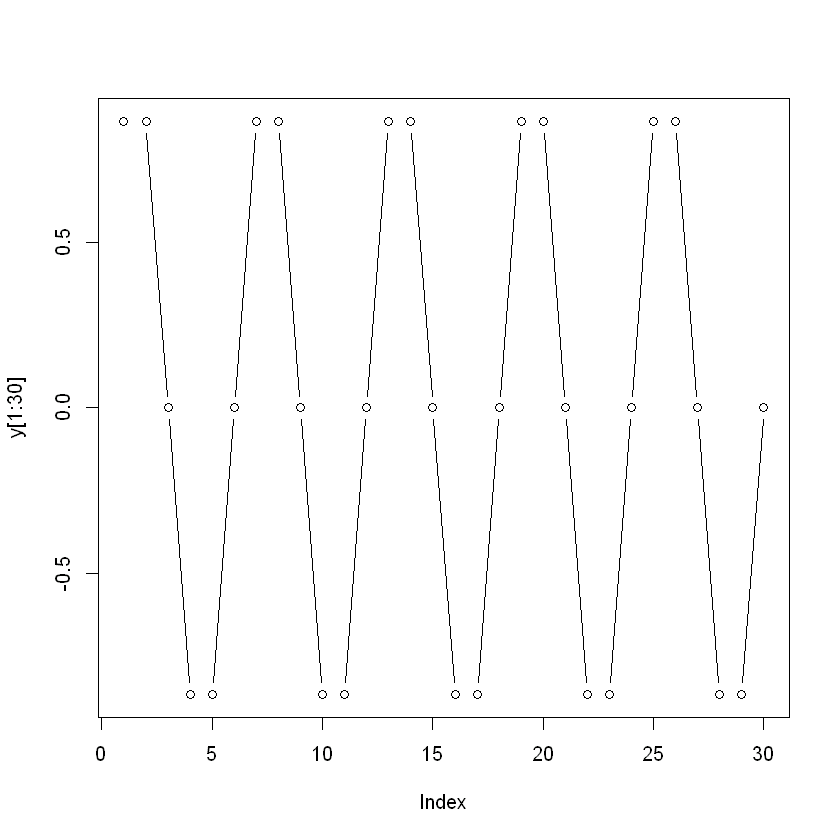

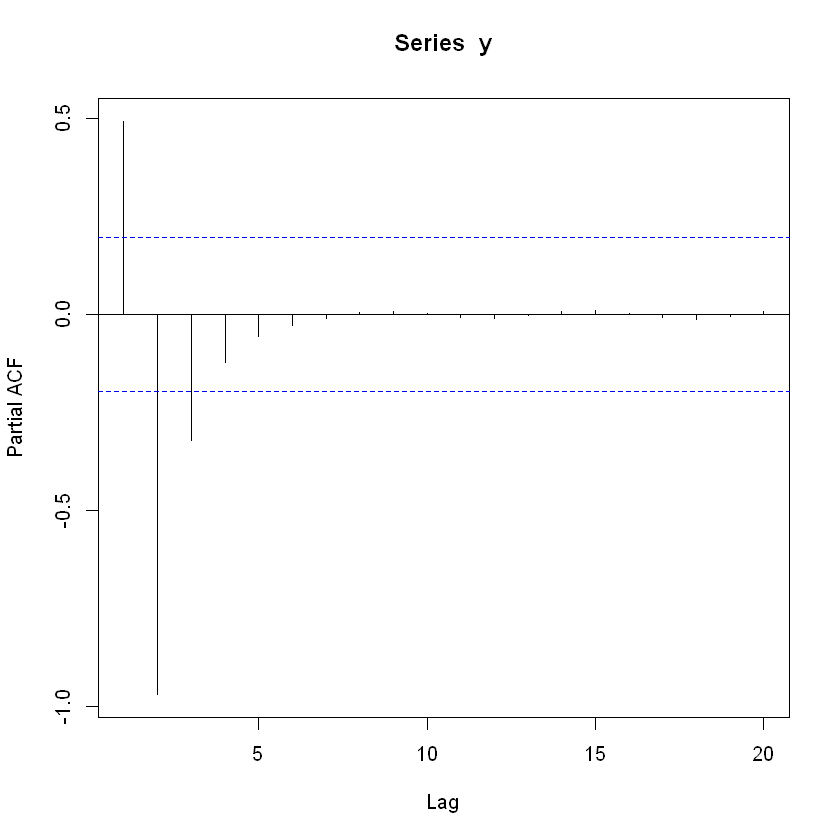

In [18]:
# 计算偏自相关性
plot(y[1:30], type = "b")
pacf(y)

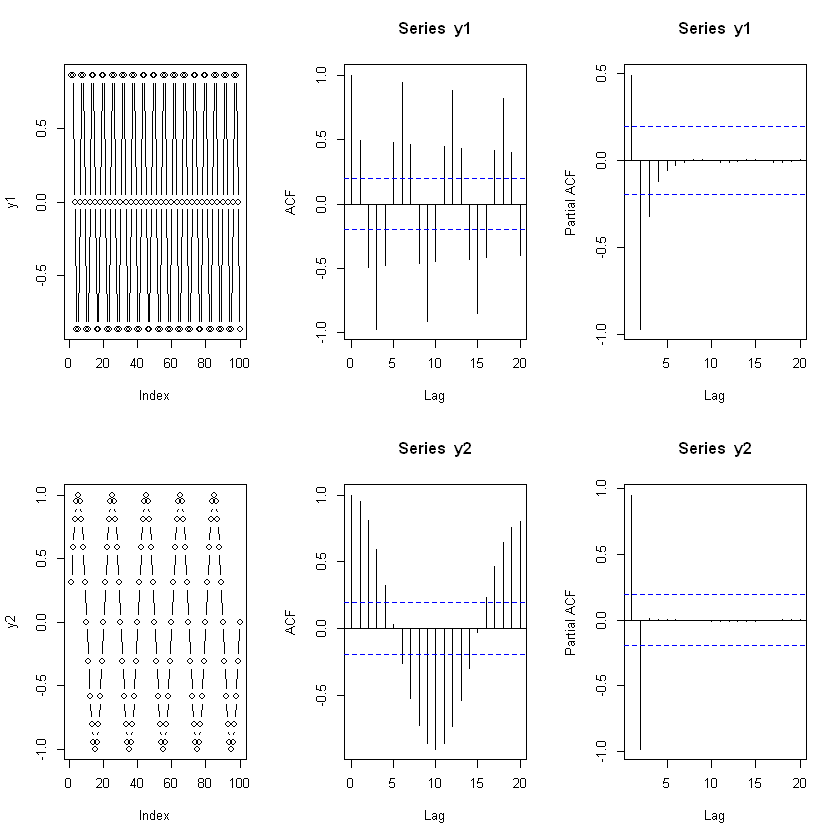

In [19]:
# 平稳时间序列数据的PACF应该会迅速降至零。对于非平稳时间序列数据，滞后量为1时的PACF值为正且相对较大。

# 设置两行三列的布局
par(mfrow = c(2, 3))

y1 <- sin(x * pi / 3)
plot(y1, type = "b")
acf(y1)
pacf(y1)

y2 <- sin(x * pi / 10)
plot(y2, type = "b")
acf(y2)
pacf(y2)

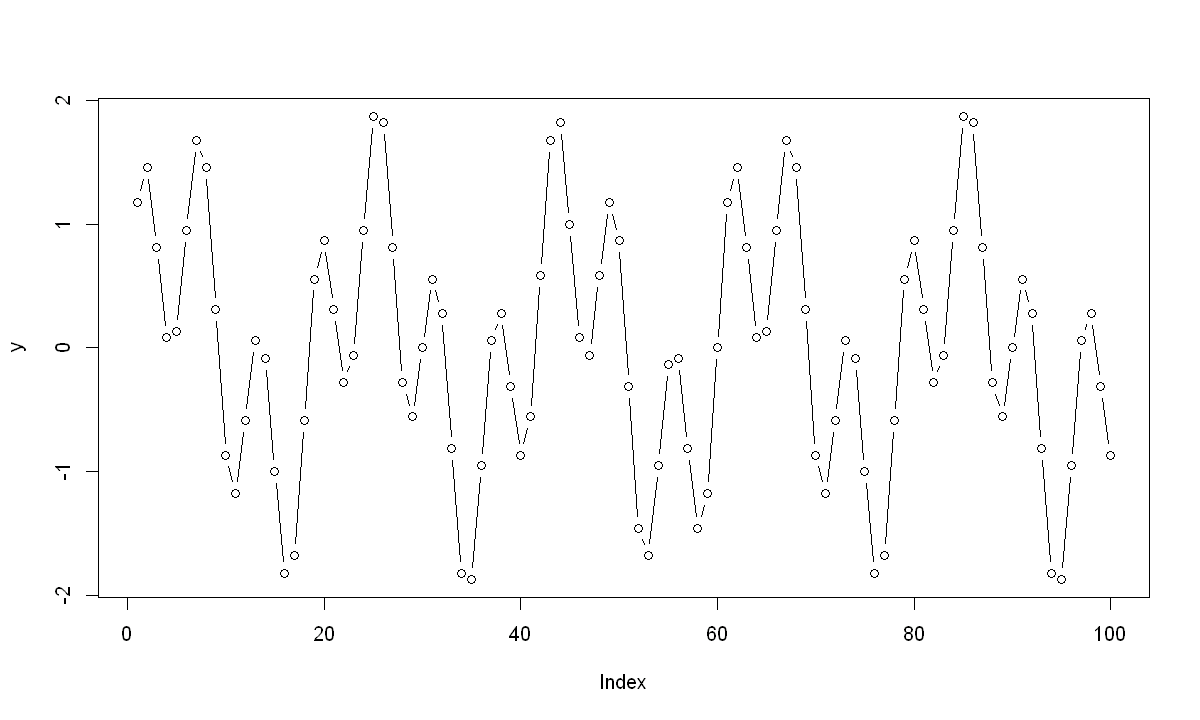

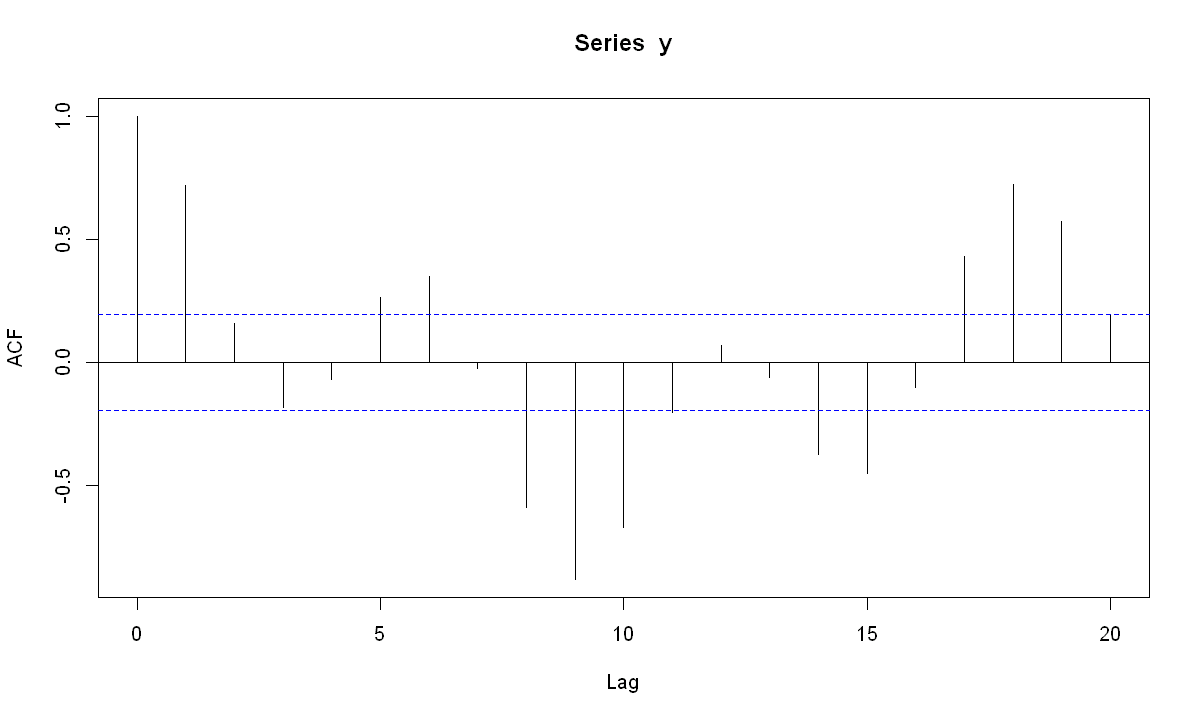

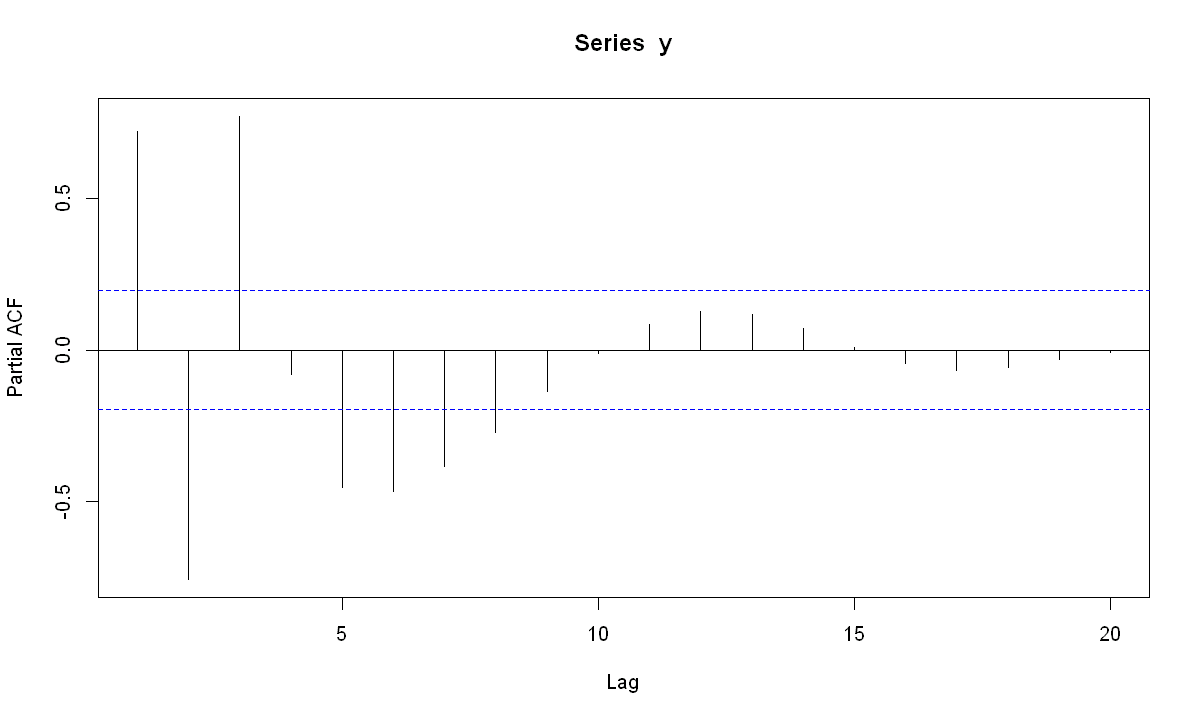

In [20]:
# 设置两个序列相加
# 设置图形输出为宽 10 英寸，高 6 英寸
options(repr.plot.width = 10, repr.plot.height = 6)
y <- y1 + y2
plot(y, type = "b")
acf(y)
pacf(y)



In [21]:
options(backup_options) # 恢复为默认选项

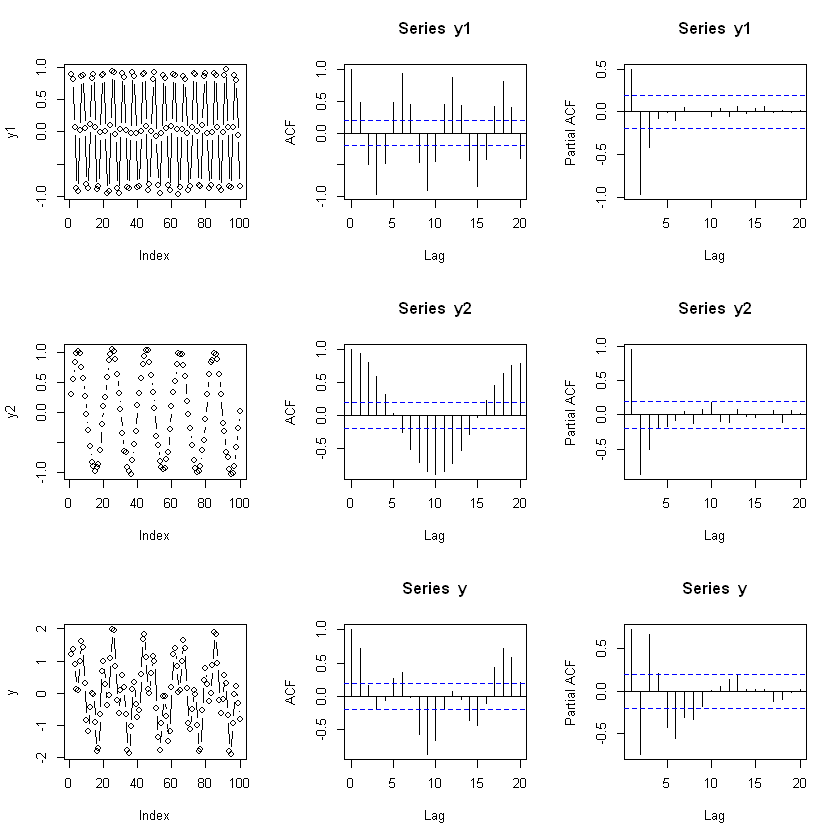

In [22]:
# 观察低噪声

# 设置两行三列的布局
par(mfrow = c(3, 3))

noise1 <- rnorm(100, sd = 0.05)
noise2 <- rnorm(100, sd = 0.05)

y1 <- y1 + noise1
y2 <- y2 + noise2
y <- y1 + y2

plot(y1, type = "b")
acf(y1)
pacf(y1)

plot(y2, type = "b")
acf(y2)
pacf(y2)

plot(y, type = "b")
acf(y)
pacf(y)

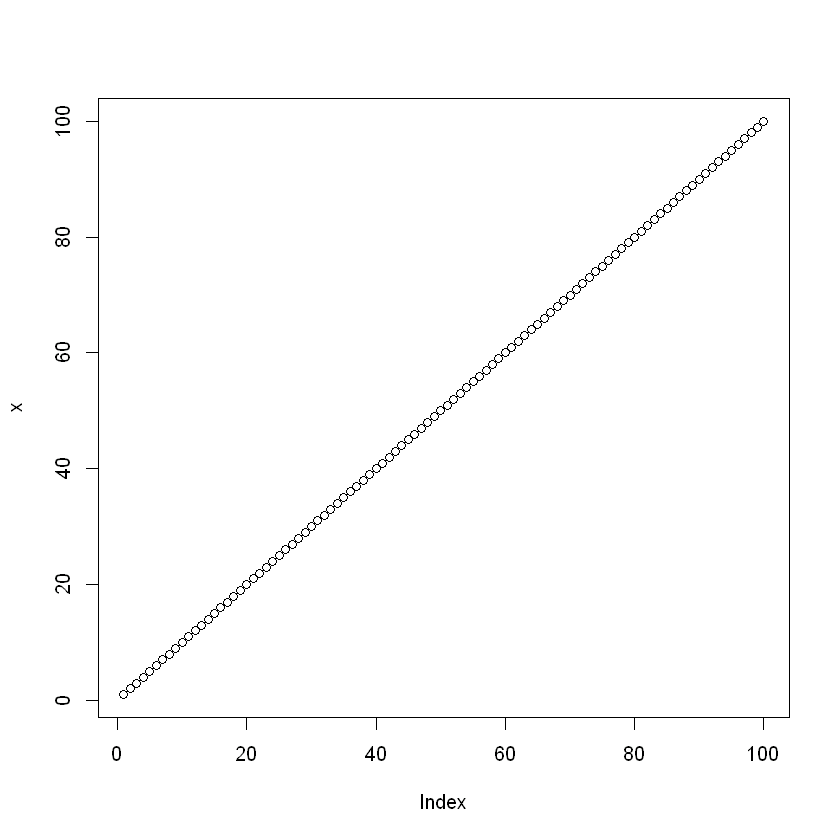

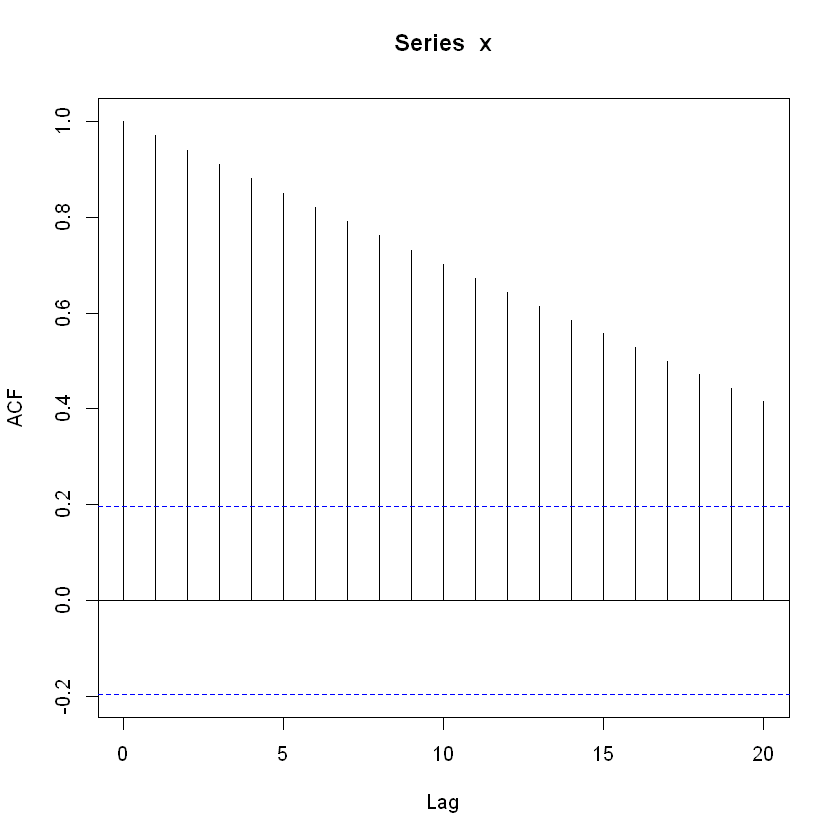

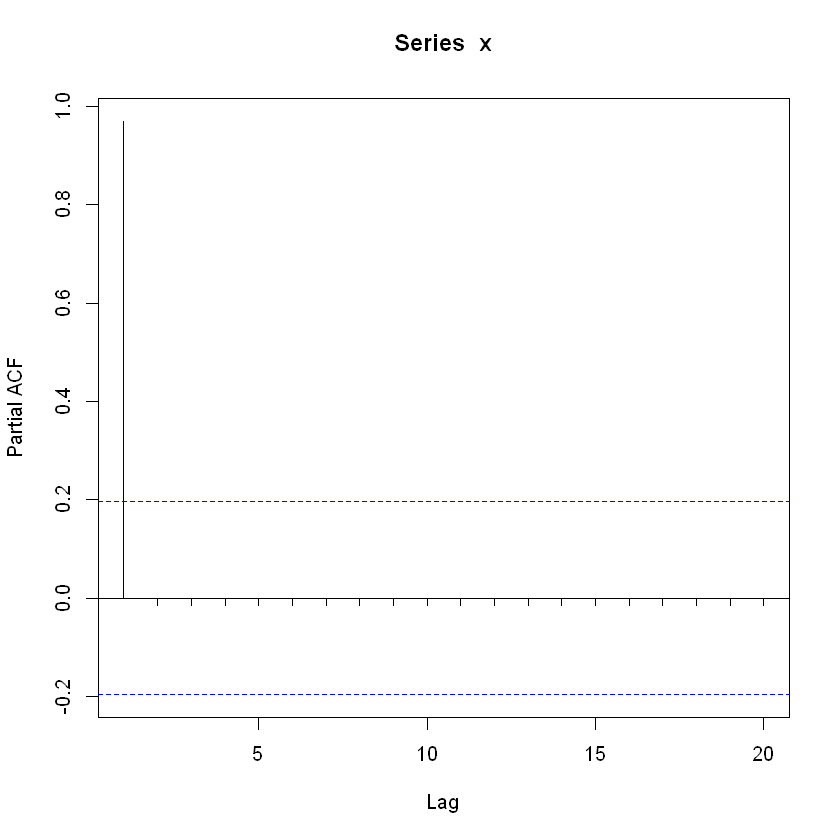

In [23]:
# 有趋势但无周期
x <- 1:100
plot(x)
acf(x)
pacf(x) # 唯一重要的东西就是滞后为1

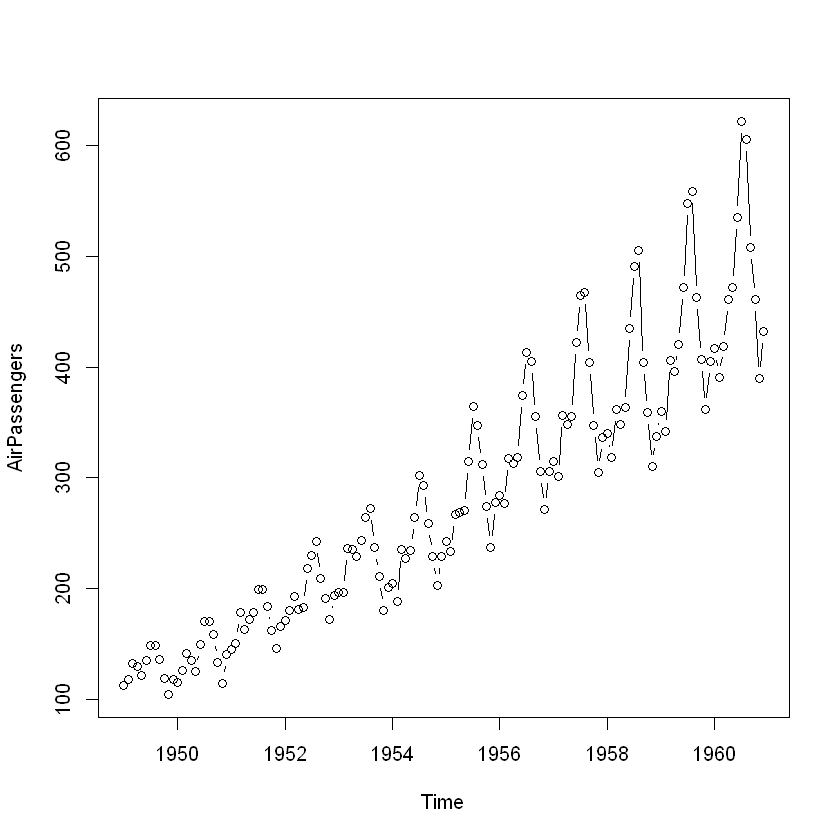

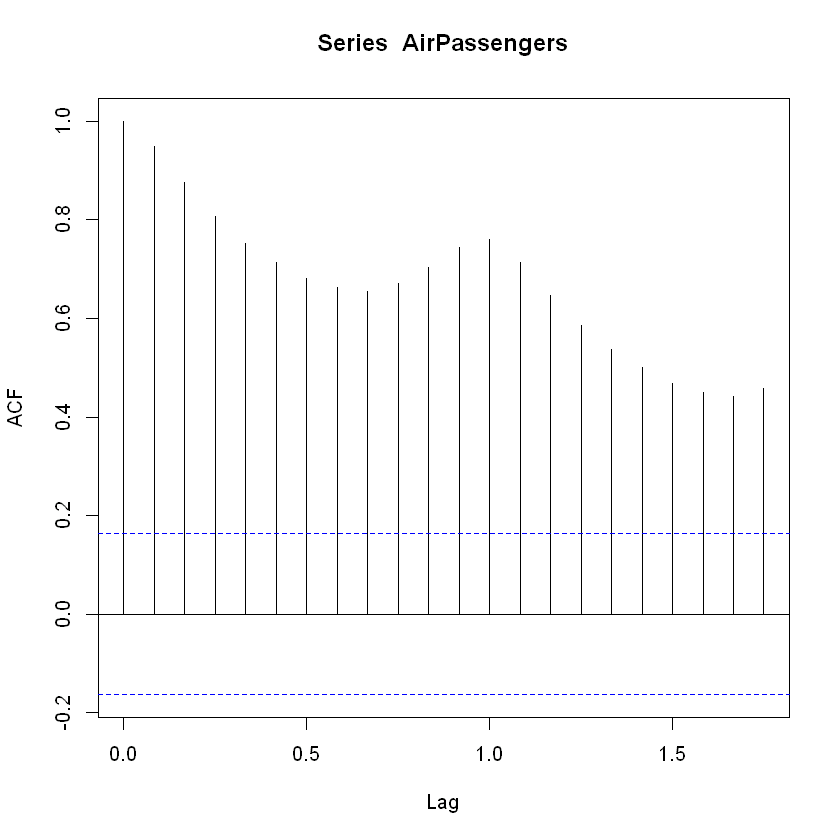

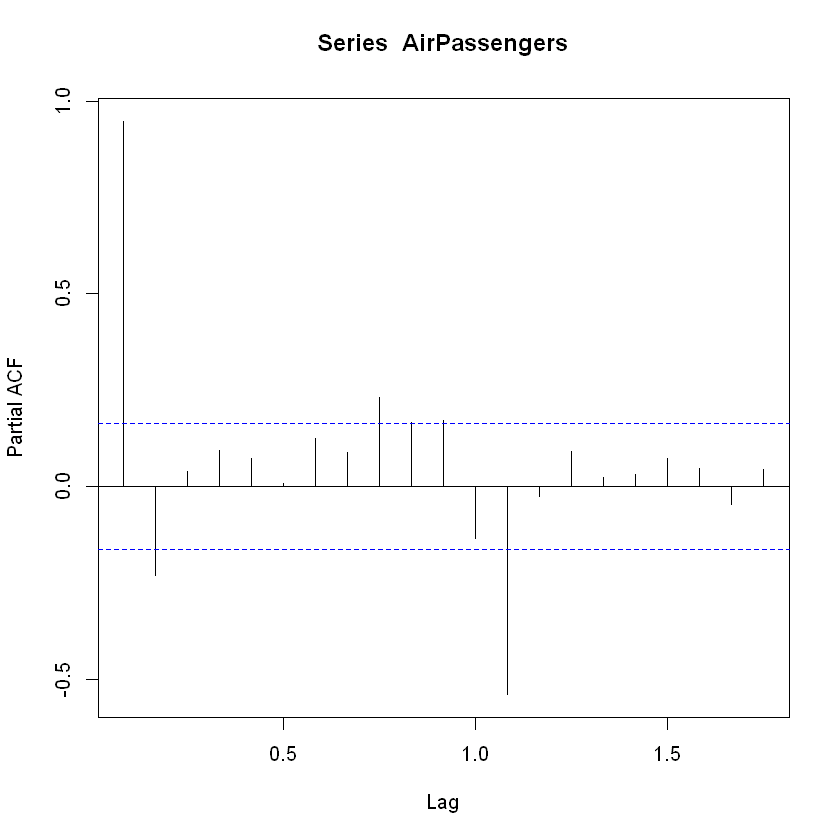

In [25]:
plot(AirPassengers, type = "b")
acf(AirPassengers)      # 绘制的图像滞后量为分数是因为数据本身的内置频率
pacf(AirPassengers)     # 关键值相距较大是因为数据中有季节性周期